___
# Decision Trees and Random Forests Guided Walkthrough



I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

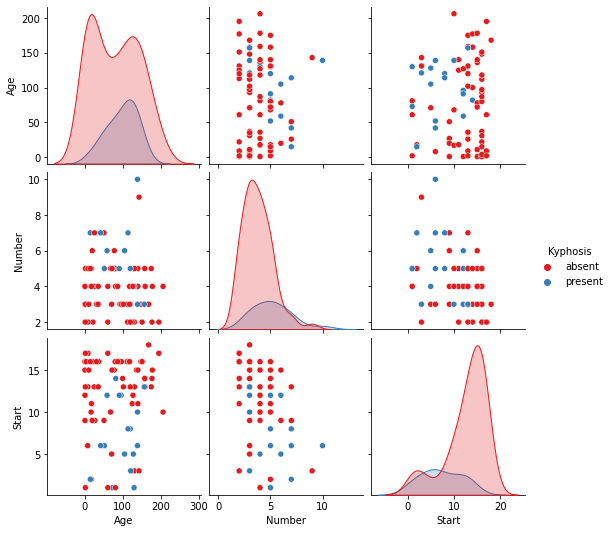

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

# we discussed the importance of splitting our dataset, now we will apply SKlearn's data split method

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [9]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
X_train.head()

,Age,Number,Start
78,120,2,13
50,68,5,10
58,51,7,9
5,1,2,16
24,15,7,2


In [15]:
X_test.head()

,Age,Number,Start
38,20,6,9
80,36,4,13
22,96,3,12
62,81,4,1
36,1,3,9


In [18]:
y_train.head()

78     absent
50     absent
58     absent
5      absent
24    present
Name: Kyphosis, dtype: object

In [19]:
y_test.head()

38     absent
80     absent
22    present
62     absent
36     absent
Name: Kyphosis, dtype: object

## Decision Trees

We'll start just by training a single decision tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree

DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]
```

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [26]:
predictions = dtree.predict(X_test)

In [28]:
predictions

array(['absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present'], dtype=object)

In [32]:
X_test.shape

(25, 3)

In [33]:
len(predictions)

25

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

# we'll talk about this more next week, this is just for demonstration purposes

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.71      0.81        21
     present       0.33      0.75      0.46         4

    accuracy                           0.72        25
   macro avg       0.64      0.73      0.64        25
weighted avg       0.84      0.72      0.75        25



In [38]:
print(confusion_matrix(y_test,predictions))

[[15  6]
 [ 1  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [66]:
# !pip install sklearn
# !pip install pydot
# !pip install six
# !pip install graphviz

In [67]:
from IPython.display import Image  
from six import StringIO
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


In [68]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [71]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

graph

In [70]:
Image(graph[0].create_png()) 

FileNotFoundError: [Errno 2] "dot" not found in path.

## Random Forests

Now let's compare the decision tree model to a random forest.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 3  2]]


In [47]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        20
    present       0.50      0.40      0.44         5

avg / total       0.79      0.80      0.79        25



# Great Job!